## Example SphericallySymmetricVolCondMEG vs. InfiniteHomogeneousVolCondMEG

This example notebook compares two alternative methods for computing magnetic fields from a current dipole. 
Class `InfiniteHomogeneousVolCondMEG` assumes an infinite homogeneous conductive medium, while class `SphericallySymmetricVolCondMEG` assumes a spherically symmetric volume conductor model where the conductance varies as function of radius. The conductance is zero outside of the sphere.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lfpykit

In [3]:
# current dipole moment
p = np.eye(3)

# current dipole location in space
r_p = np.array([0, 0, 90000])

# points on sphere surface
u = np.linspace(0, 2*np.pi, 25)
v = np.linspace(0, np.pi, 25)
x = 110000 * np.outer(np.cos(u), np.sin(v))
y = 110000 * np.outer(np.sin(u), np.sin(v))
z = 110000 * np.outer(np.ones(np.size(u)), np.cos(v))

# sensor location(s) in space
r = np.c_[x.flatten(), y.flatten(), z.flatten()]

In [4]:
# spherically symmetric volume conductor model
meg_sphere = lfpykit.eegmegcalc.SphericallySymmetricVolCondMEG(r=r)

# linear mapping between current dipole moment and signal at sensor locations
M_sphere = meg_sphere.get_transformation_matrix(r_p=r_p)

In [5]:
# infinite homogeneous volume conductor model
meg_infty = lfpykit.eegmegcalc.InfiniteHomogeneousVolCondMEG(sensor_locations=r)

# linear mapping between current dipole moment and signal at sensor locations
M_infty = meg_infty.get_transformation_matrix(dipole_location=r_p)

In [6]:
# compute magnetic field using each model
H_sphere = M_sphere @ p
H_infty = M_infty @ p

In [7]:
scaling=1E15  # arbitrary scaling of arrow lengths in quiver plots
axis = 1  # plot H in direction of y-axis (try replacing this value with 0 or 2)

Text(0.5, 0, 'z (µm)')

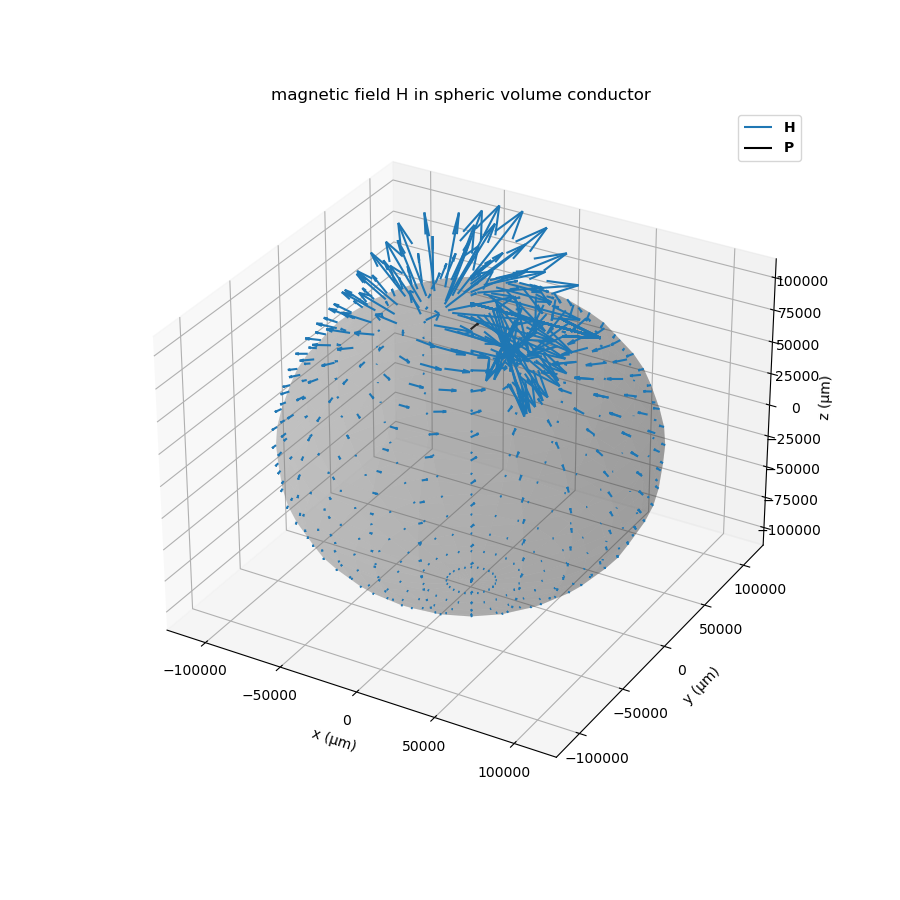

In [8]:
# quiver plots for dipole in spherically symmetric volume conductor
ax = plt.figure(figsize=(9, 9)).add_subplot(projection='3d')
ax.set_title('magnetic field H in spheric volume conductor')
ax.plot_surface(x, y, z, alpha=0.25, color='gray')

ax.quiver3D(r[:, 0], r[:, 1], r[:, 2], 
            H_sphere[:, 0, axis]*scaling, H_sphere[:, 1, axis]*scaling, H_sphere[:, 2, axis]*scaling, 
            length=1, normalize=False, label='$\mathbf{H}$')
ax.quiver3D(r_p[0], r_p[1], r_p[2],
            p[0, axis], p[1, axis], p[2, axis], color='k', 
            length=1E4, normalize=False, label='$\mathbf{P}$')
ax.legend()
ax.set_xlabel('x (µm)')
ax.set_ylabel('y (µm)')
ax.set_zlabel('z (µm)')

Text(0.5, 0, 'z (µm)')

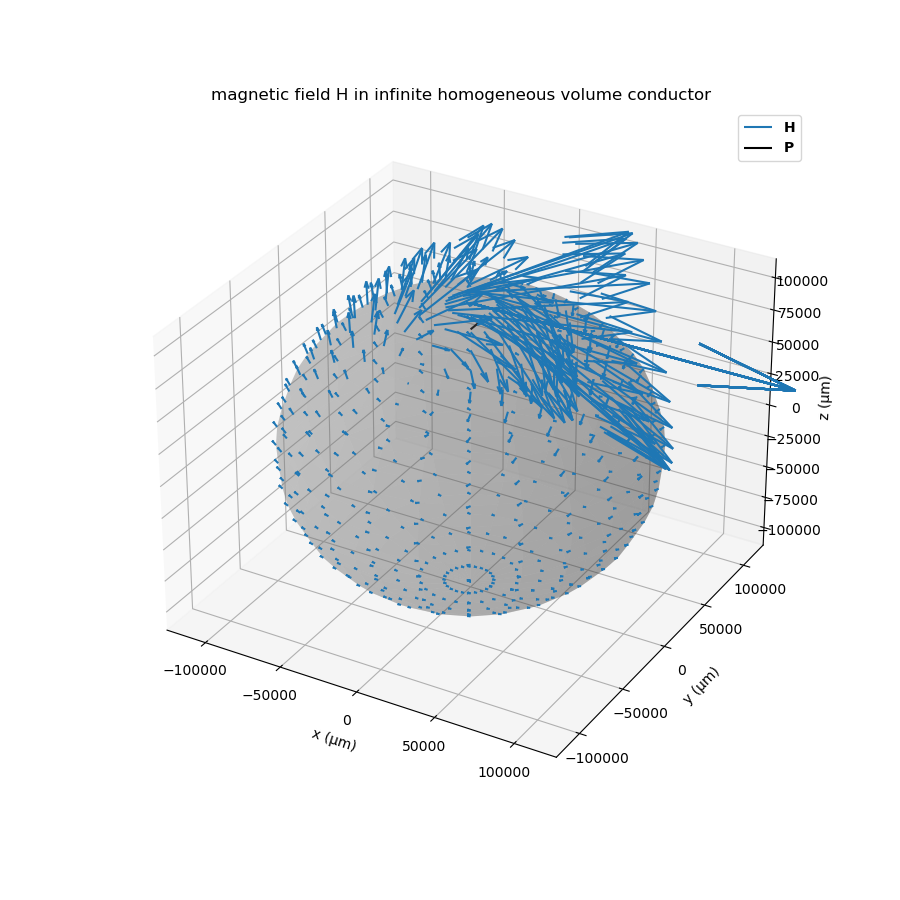

In [9]:
# quiver plots for dipole in infinite homogeneous volume conductor
ax = plt.figure(figsize=(9, 9)).add_subplot(projection='3d')
ax.set_title('magnetic field H in infinite homogeneous volume conductor')
ax.plot_surface(x, y, z, alpha=0.25, color='gray')

ax.quiver3D(r[:, 0], r[:, 1], r[:, 2], 
            H_infty[:, 0, axis]*scaling, H_infty[:, 1, axis]*scaling, H_infty[:, 2, axis]*scaling, 
            length=1, normalize=False, label='$\mathbf{H}$')
ax.quiver3D(r_p[0], r_p[1], r_p[2],
            p[0, axis], p[1, axis], p[2, axis], color='k', 
            length=1E4, normalize=False, label='$\mathbf{P}$')
ax.legend()
ax.set_xlabel('x (µm)')
ax.set_ylabel('y (µm)')
ax.set_zlabel('z (µm)')